In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# File paths (use raw strings to avoid backslash issues)
input_file = "C:\\Users\\Hp\\OneDrive\\Documents\\project\\SRU_Project\\data\\IN_Table.csv"
output_file = "C:\\Users\\Hp\\OneDrive\\Documents\\project\\SRU_Project\\data\\OUT_Table.csv"

# Load data
input_df = pd.read_csv(input_file)
output_df = pd.read_csv(output_file)

# Combine data
data = pd.concat([input_df, output_df], axis=1)

In [4]:
# Define input and output columns
input_columns = data.columns[:5]   # Assuming 5 input variables
output_columns = data.columns[5:]  # Assuming 2 output variables

X = data[input_columns].values
Y = data[output_columns].values

# Split into train and validation sets (70/30)
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.3, random_state=40)

In [41]:
# Initialize models for each output
model_1 = XGBRegressor(n_estimators=1000, learning_rate=0.1, random_state=42)
model_2 = XGBRegressor(n_estimators=1000, learning_rate=0.1, random_state=42)

In [42]:
# Train models
model_1.fit(X_train, Y_train[:, 0])
model_2.fit(X_train, Y_train[:, 1])

# Predict
y_pred_1 = model_1.predict(X_valid)
y_pred_2 = model_2.predict(X_valid)
y_pred = np.column_stack((y_pred_1, y_pred_2))

In [43]:
# Evaluate
mse = mean_squared_error(Y_valid, y_pred, multioutput='raw_values')
r2 = r2_score(Y_valid, y_pred, multioutput='raw_values')

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: [0.28442949 0.37256458]
R-squared: [0.73187855 0.62261832]


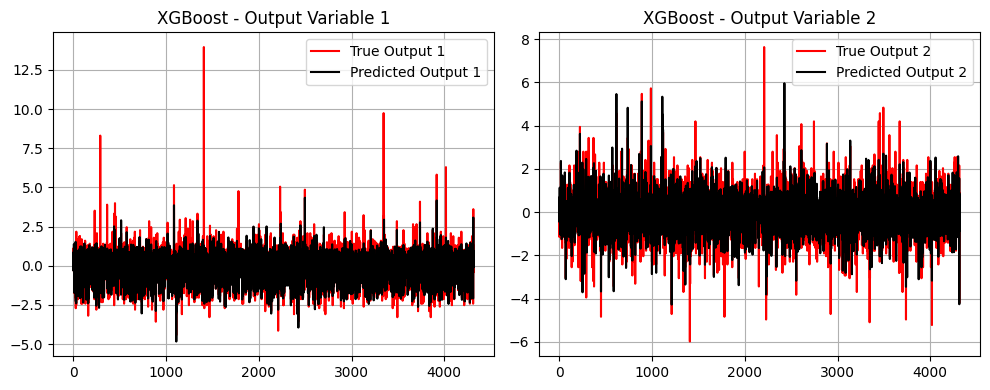

In [ ]:
# Plot true vs predicted for each output
plt.figure(figsize=(10, 4))
plt.plot(Y_valid[:, 0], 'r', label='True Output 1')
plt.plot(y_pred_1, 'k', label='Predicted Output 1')
plt.title("XGBoost - Output Variable 1")
plt.legend()
plt.grid(True)

plt.plot(Y_valid[:, 1], 'r', label='True Output 2')
plt.plot(y_pred_2, 'k', label='Predicted Output 2')
plt.title("XGBoost - Output Variable 2")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()